# Reliance Industries
### Stock Analysis and Forecasting

## Business Objective

Predict the Reliance Industries Stock Price for the next 30 days.

There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 2015 to 2022 for Reliance Industries stock.

- Split the last year into a test set- to build a model to predict stock price.

- Find short term, & long term trends.

- Understand how it is impacted from external factors or any big external events.

- Forecast for next 30 days.

## Collection of Dataset

- For this project, we will be using the Yfinance library to get the data, which makes it easy to process.

- We collected data from 1-Jan-2015 to 28-Feb-2023.

- But also you can download data from ‘Yahoo! Finance’ website. You can use Below link. 

- https://finance.yahoo.com/quote/RELIANCE.NS/history?p=RELIANCE.NS

## About the data

- Date: Date of trade

- Open: Opening Price of Stock

- High: Highest price of stock on that day

- Low: Lowest price of stock on that day

- Close: Close price adjusted for splits.

- Adj  Close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

- Volume: Volume of stock on that day

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
data=yf.download('RELIANCE.NS', start='2015-1-1', end='2023-2-28').reset_index(drop=False)
reliance_0 = pd.DataFrame(data)

[*********************100%%**********************]  1 of 1 completed


In [3]:
reliance_0.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,416.517609,1367720
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,415.415161,3383424
2,2015-01-05,438.344940,441.267212,432.946106,433.812897,410.864929,4662967
3,2015-01-06,430.915344,432.401276,412.093750,414.124512,392.217987,8596809
4,2015-01-07,414.619812,425.367950,414.570282,423.139069,400.755676,9562421
5,2015-01-08,426.011841,427.398682,416.130493,417.071564,395.009125,9171029
6,2015-01-09,420.216766,426.952911,418.532715,426.110901,403.570312,6180769
7,2015-01-12,426.209961,426.457611,416.848694,421.157837,398.879242,4661200
8,2015-01-13,422.495178,423.460999,416.303864,417.616425,395.525208,4591328
9,2015-01-14,417.542114,419.523346,411.697510,413.554901,391.678497,5251887


In [4]:
reliance_0.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2023-02-14,2329.949951,2381.899902,2323.649902,2378.100098,2369.729248,6609564
2007,2023-02-15,2376.000000,2437.199951,2373.000000,2431.949951,2423.389404,15461902
2008,2023-02-16,2449.449951,2463.800049,2425.050049,2430.050049,2421.496338,7967558
2009,2023-02-17,2420.000000,2447.500000,2410.600098,2440.199951,2431.610352,5450092
2010,2023-02-20,2445.000000,2449.750000,2410.100098,2414.399902,2405.901123,4078245
2011,2023-02-21,2424.000000,2446.800049,2412.350098,2434.100098,2425.531982,6143298
2012,2023-02-22,2425.949951,2430.000000,2375.050049,2378.899902,2370.526123,5087729
2013,2023-02-23,2378.000000,2394.750000,2361.350098,2367.500000,2359.166260,4546655
2014,2023-02-24,2372.000000,2396.149902,2368.000000,2383.699951,2375.309326,4353814
2015,2023-02-27,2382.000000,2389.649902,2351.699951,2367.850098,2359.515137,5168667


# EDA

Analysis is only based on Open, High, Low, close price and volume

There is no need of Adj Close

In [5]:
# Removing "Adj Close" columnfrom dataset
reliance_1=reliance_0.drop(["Adj Close"],axis=1).reset_index(drop=True)
reliance_1

,Date,Open,High,Low,Close,Volume
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,1367720
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,3383424
2,2015-01-05,438.344940,441.267212,432.946106,433.812897,4662967
3,2015-01-06,430.915344,432.401276,412.093750,414.124512,8596809
4,2015-01-07,414.619812,425.367950,414.570282,423.139069,9562421
...,...,...,...,...,...,...
2011,2023-02-21,2424.000000,2446.800049,2412.350098,2434.100098,6143298
2012,2023-02-22,2425.949951,2430.000000,2375.050049,2378.899902,5087729
2013,2023-02-23,2378.000000,2394.750000,2361.350098,2367.500000,4546655
2014,2023-02-24,2372.000000,2396.149902,2368.000000,2383.699951,4353814


In [6]:
# Finding duplicate columns, if any
reliance_1[reliance_1.duplicated()]

,Date,Open,High,Low,Close,Volume


In [7]:
# Finding null values, if any
reliance_1.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
#To check which rows have any missing value under any column
reliance_1[reliance_1.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Volume


In [9]:
# Removing the row which have null value
reliance_2=reliance_1.dropna().reset_index(drop=True)
reliance_2

,Date,Open,High,Low,Close,Volume
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,1367720
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,3383424
2,2015-01-05,438.344940,441.267212,432.946106,433.812897,4662967
3,2015-01-06,430.915344,432.401276,412.093750,414.124512,8596809
4,2015-01-07,414.619812,425.367950,414.570282,423.139069,9562421
...,...,...,...,...,...,...
2011,2023-02-21,2424.000000,2446.800049,2412.350098,2434.100098,6143298
2012,2023-02-22,2425.949951,2430.000000,2375.050049,2378.899902,5087729
2013,2023-02-23,2378.000000,2394.750000,2361.350098,2367.500000,4546655
2014,2023-02-24,2372.000000,2396.149902,2368.000000,2383.699951,4353814


In [10]:
# Checking wether if there exist any null values
reliance_2[reliance_2.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Volume


In [11]:
# Making a copy of dataset as reliance
reliance=reliance_2.copy()
reliance

,Date,Open,High,Low,Close,Volume
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,1367720
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,3383424
2,2015-01-05,438.344940,441.267212,432.946106,433.812897,4662967
3,2015-01-06,430.915344,432.401276,412.093750,414.124512,8596809
4,2015-01-07,414.619812,425.367950,414.570282,423.139069,9562421
...,...,...,...,...,...,...
2011,2023-02-21,2424.000000,2446.800049,2412.350098,2434.100098,6143298
2012,2023-02-22,2425.949951,2430.000000,2375.050049,2378.899902,5087729
2013,2023-02-23,2378.000000,2394.750000,2361.350098,2367.500000,4546655
2014,2023-02-24,2372.000000,2396.149902,2368.000000,2383.699951,4353814


#### Discriptive Statistics

In [12]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2016 non-null   datetime64[ns]
 1   Open    2016 non-null   float64       
 2   High    2016 non-null   float64       
 3   Low     2016 non-null   float64       
 4   Close   2016 non-null   float64       
 5   Volume  2016 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 94.6 KB


In [13]:
reliance.describe()

,Date,Open,High,Low,Close,Volume
count,2016,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,2019-02-02 01:47:08.571428608,1337.908046,1352.926633,1322.061606,1336.877289,9.038830e+06
min,2015-01-01 00:00:00,404.466064,405.010895,394.485657,401.568542,7.871600e+05
25%,2017-01-17 18:00:00,536.043854,540.278671,530.230209,535.053238,5.231165e+06
50%,2019-01-30 12:00:00,1197.102661,1215.230835,1181.624390,1197.028381,7.117702e+06
75%,2021-02-16 06:00:00,2085.000000,2105.187500,2060.862549,2082.799927,1.021177e+07
max,2023-02-27 00:00:00,2856.149902,2856.149902,2786.100098,2819.850098,6.584835e+07
std,NaN,760.828741,768.900965,751.945805,760.069411,6.646431e+06


In [14]:
reliance.corr()

,Date,Open,High,Low,Close,Volume
Date,1.000000,0.966801,0.967177,0.966593,0.966916,0.092894
Open,0.966801,1.000000,0.999745,0.999744,0.999469,0.059469
High,0.967177,0.999745,1.000000,0.999687,0.999803,0.068541
Low,0.966593,0.999744,0.999687,1.000000,0.999777,0.052957
Close,0.966916,0.999469,0.999803,0.999777,1.000000,0.061589
Volume,0.092894,0.059469,0.068541,0.052957,0.061589,1.000000


- Every attributes are highly corelated except volume

In [15]:
# converting the date column in to datetime 
reliance['Date']=pd.to_datetime(reliance['Date'],format='%Y-%m-%d')
reliance

,Date,Open,High,Low,Close,Volume
0,2015-01-01,438.988831,441.812073,437.676270,439.781311,1367720
1,2015-01-02,439.880371,443.818054,437.998199,438.617340,3383424
2,2015-01-05,438.344940,441.267212,432.946106,433.812897,4662967
3,2015-01-06,430.915344,432.401276,412.093750,414.124512,8596809
4,2015-01-07,414.619812,425.367950,414.570282,423.139069,9562421
...,...,...,...,...,...,...
2011,2023-02-21,2424.000000,2446.800049,2412.350098,2434.100098,6143298
2012,2023-02-22,2425.949951,2430.000000,2375.050049,2378.899902,5087729
2013,2023-02-23,2378.000000,2394.750000,2361.350098,2367.500000,4546655
2014,2023-02-24,2372.000000,2396.149902,2368.000000,2383.699951,4353814


In [16]:
# Setting the date column as index
reliance=reliance.set_index('Date')
reliance

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311,1367720
2015-01-02,439.880371,443.818054,437.998199,438.617340,3383424
2015-01-05,438.344940,441.267212,432.946106,433.812897,4662967
2015-01-06,430.915344,432.401276,412.093750,414.124512,8596809
2015-01-07,414.619812,425.367950,414.570282,423.139069,9562421
...,...,...,...,...,...
2023-02-21,2424.000000,2446.800049,2412.350098,2434.100098,6143298
2023-02-22,2425.949951,2430.000000,2375.050049,2378.899902,5087729
2023-02-23,2378.000000,2394.750000,2361.350098,2367.500000,4546655


### Visualizations

Text(0.5, 1.0, 'Low')

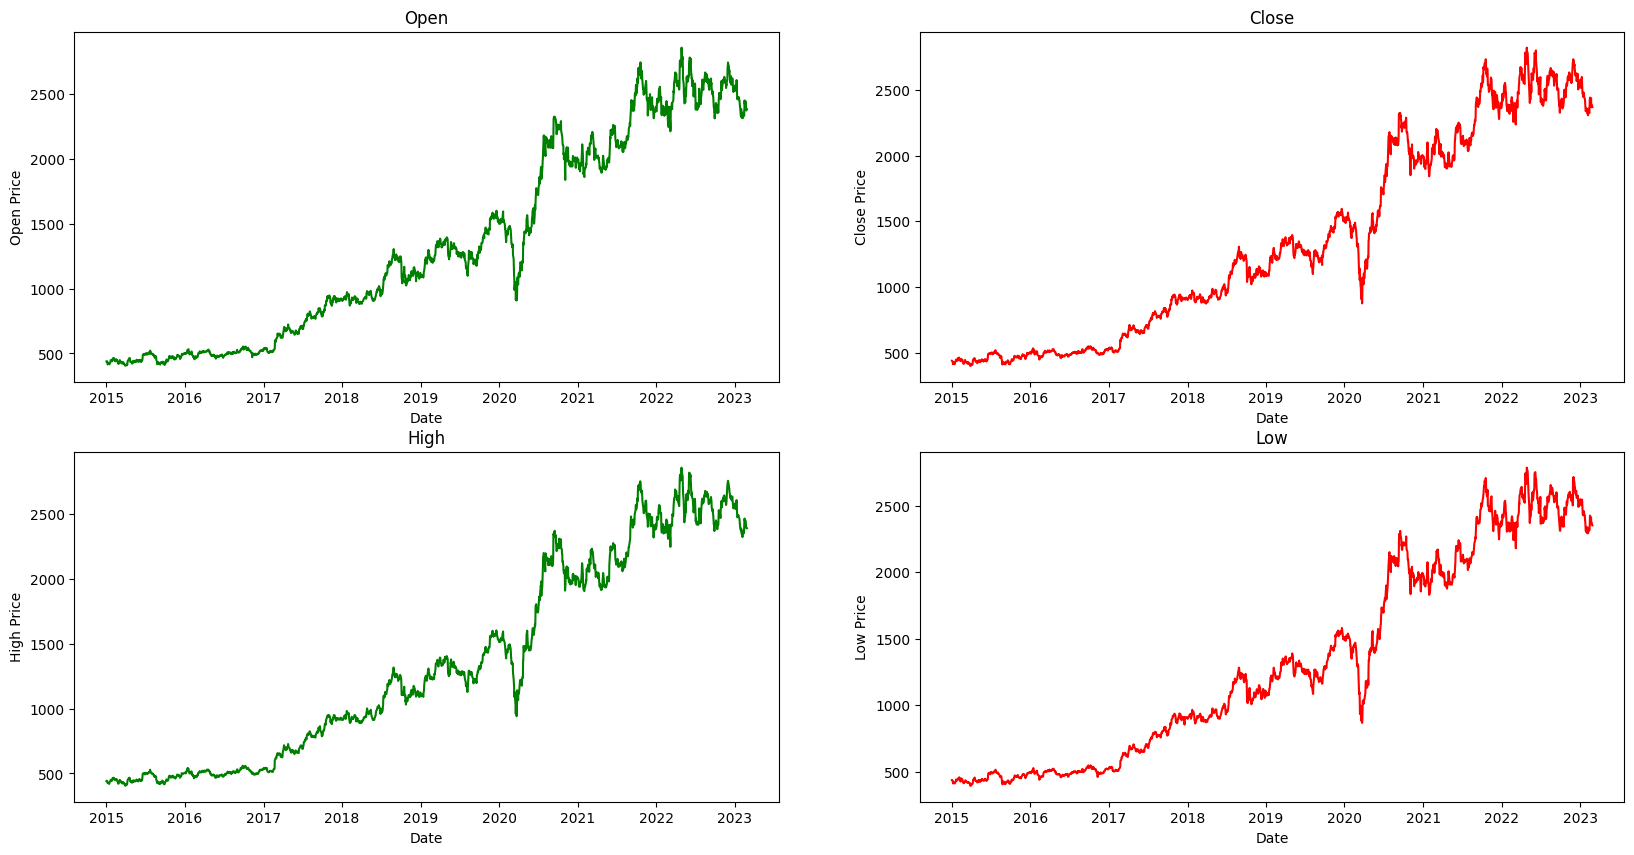

In [17]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(reliance['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(reliance['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(reliance['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(reliance['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

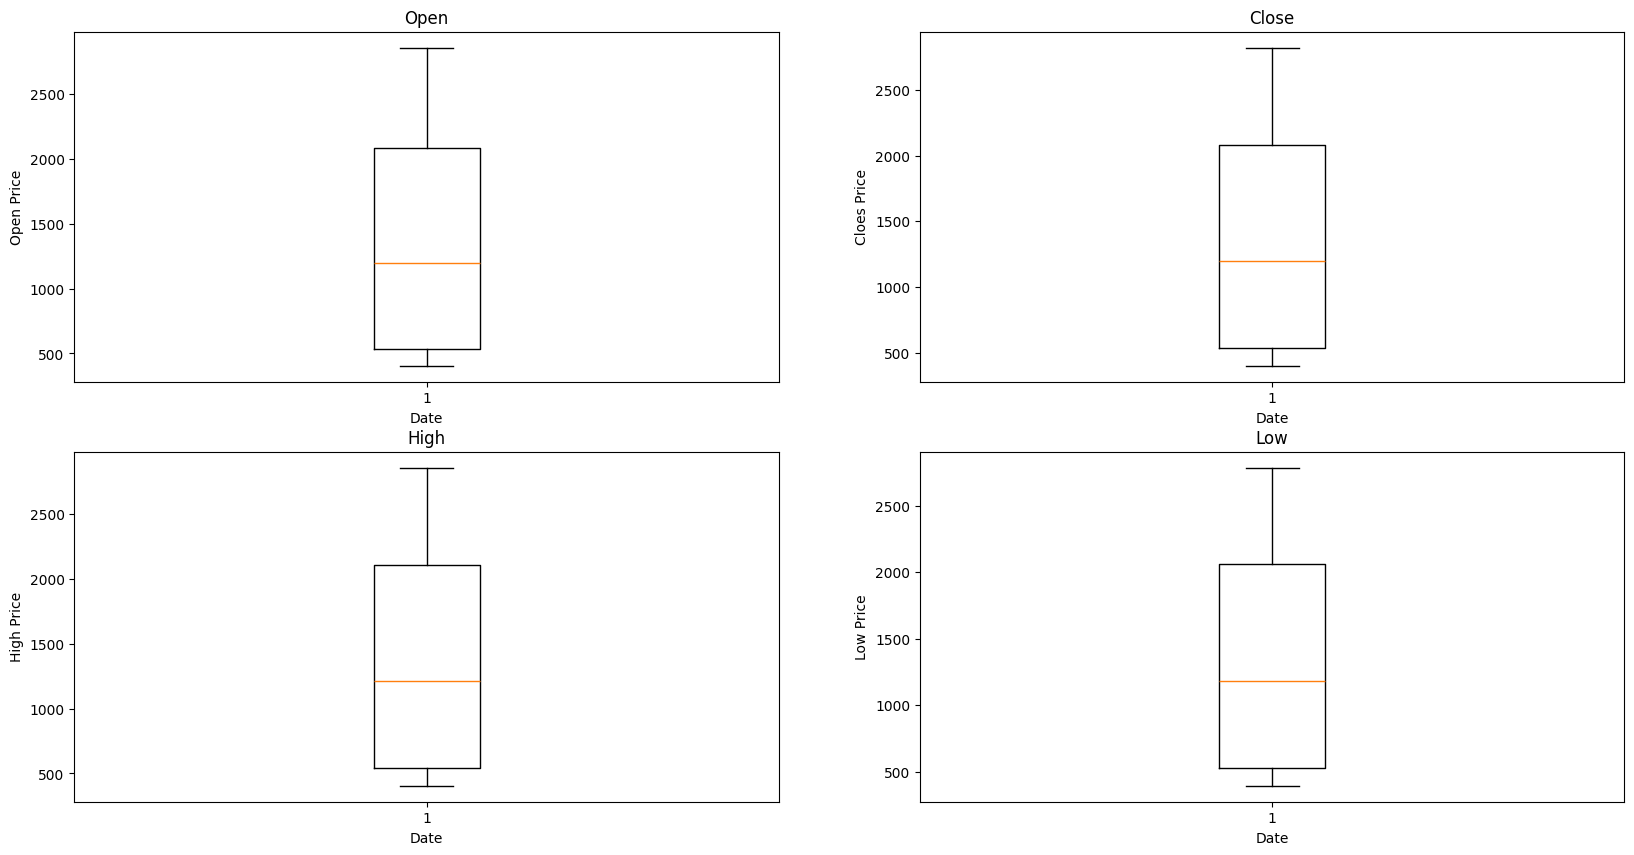

In [18]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(reliance['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(reliance['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(reliance['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(reliance['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

From the box plot it is clear that there are no outliers inthe dataset

Text(0.5, 1.0, 'Low')

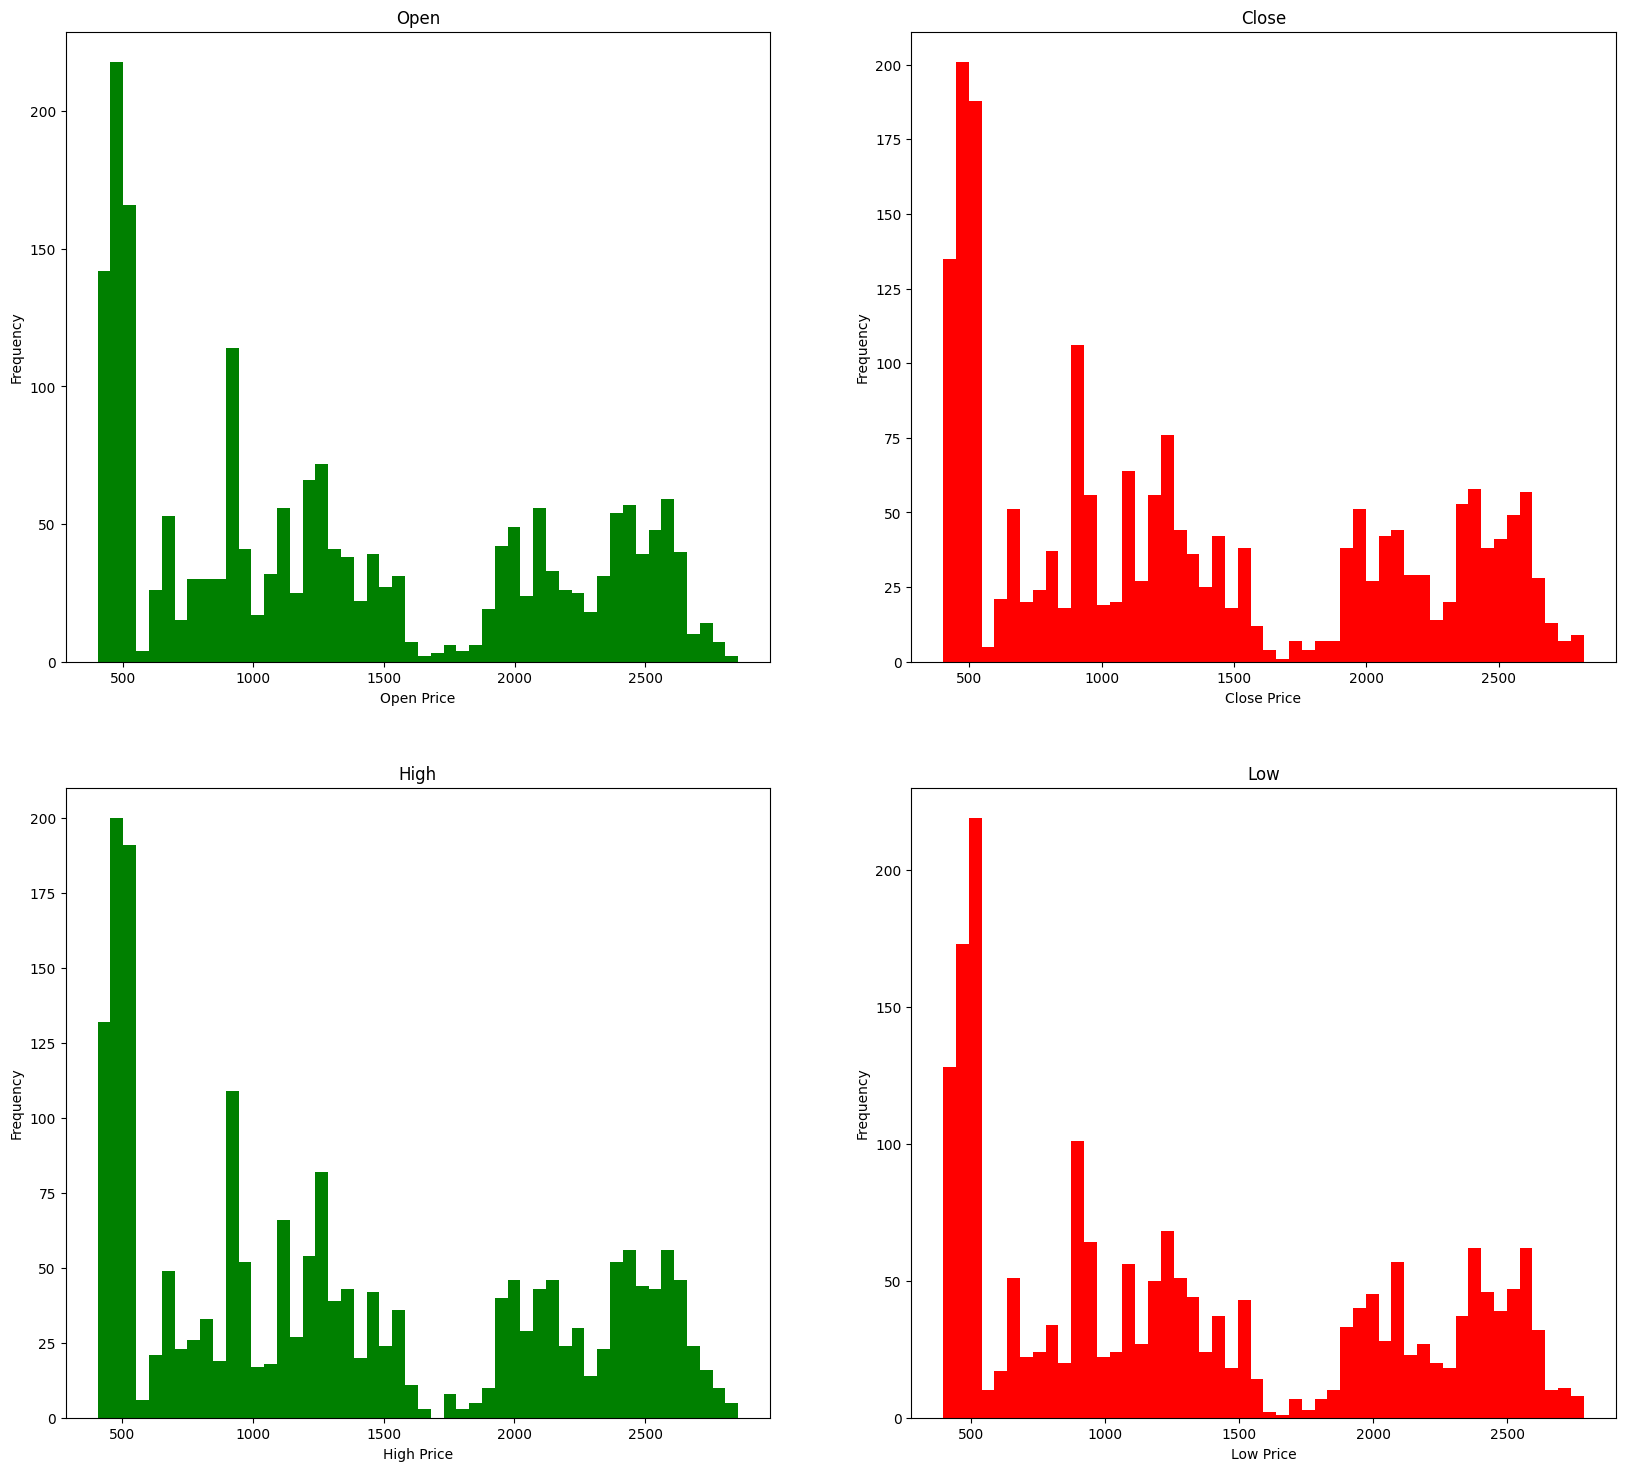

In [19]:
# Ploting Histogram
plt.figure(figsize=(20,18))
#Plot 1
plt.subplot(2,2,1)
plt.hist(reliance['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.hist(reliance['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.hist(reliance['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.hist(reliance['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

Text(0.5, 1.0, 'Low')

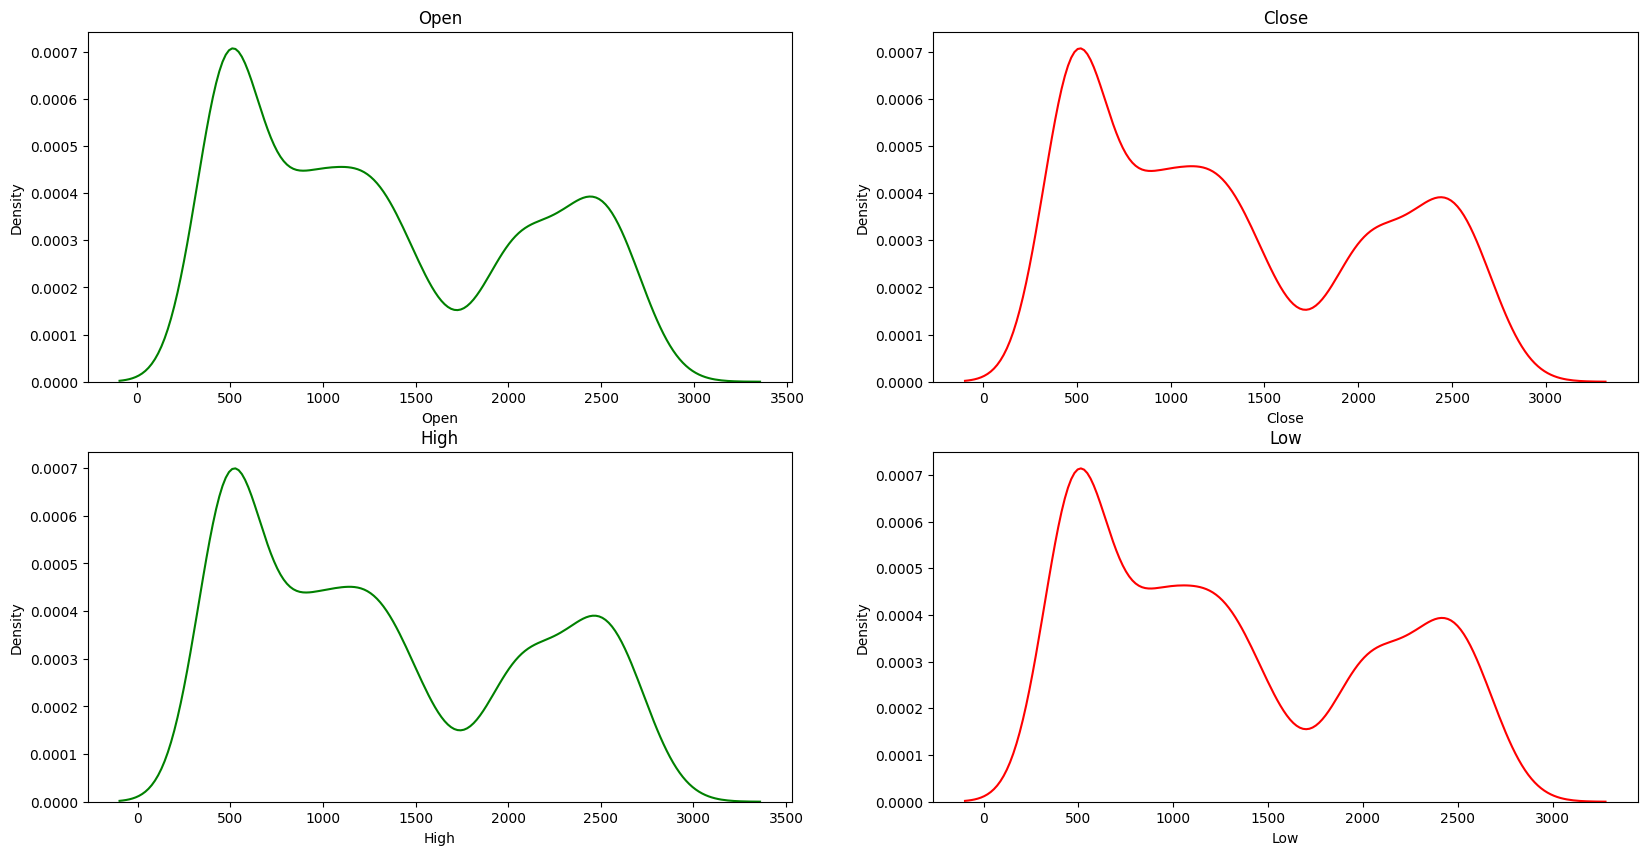

In [20]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(reliance['Open'], color='green')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(reliance['Close'], color='red')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
sns.kdeplot(reliance['High'], color='green')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
sns.kdeplot(reliance['Low'], color='red')
plt.title('Low')

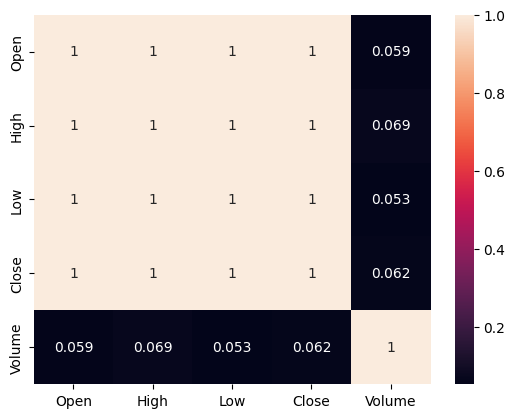

In [21]:
sns.heatmap(reliance.corr(),annot=True)
plt.show()

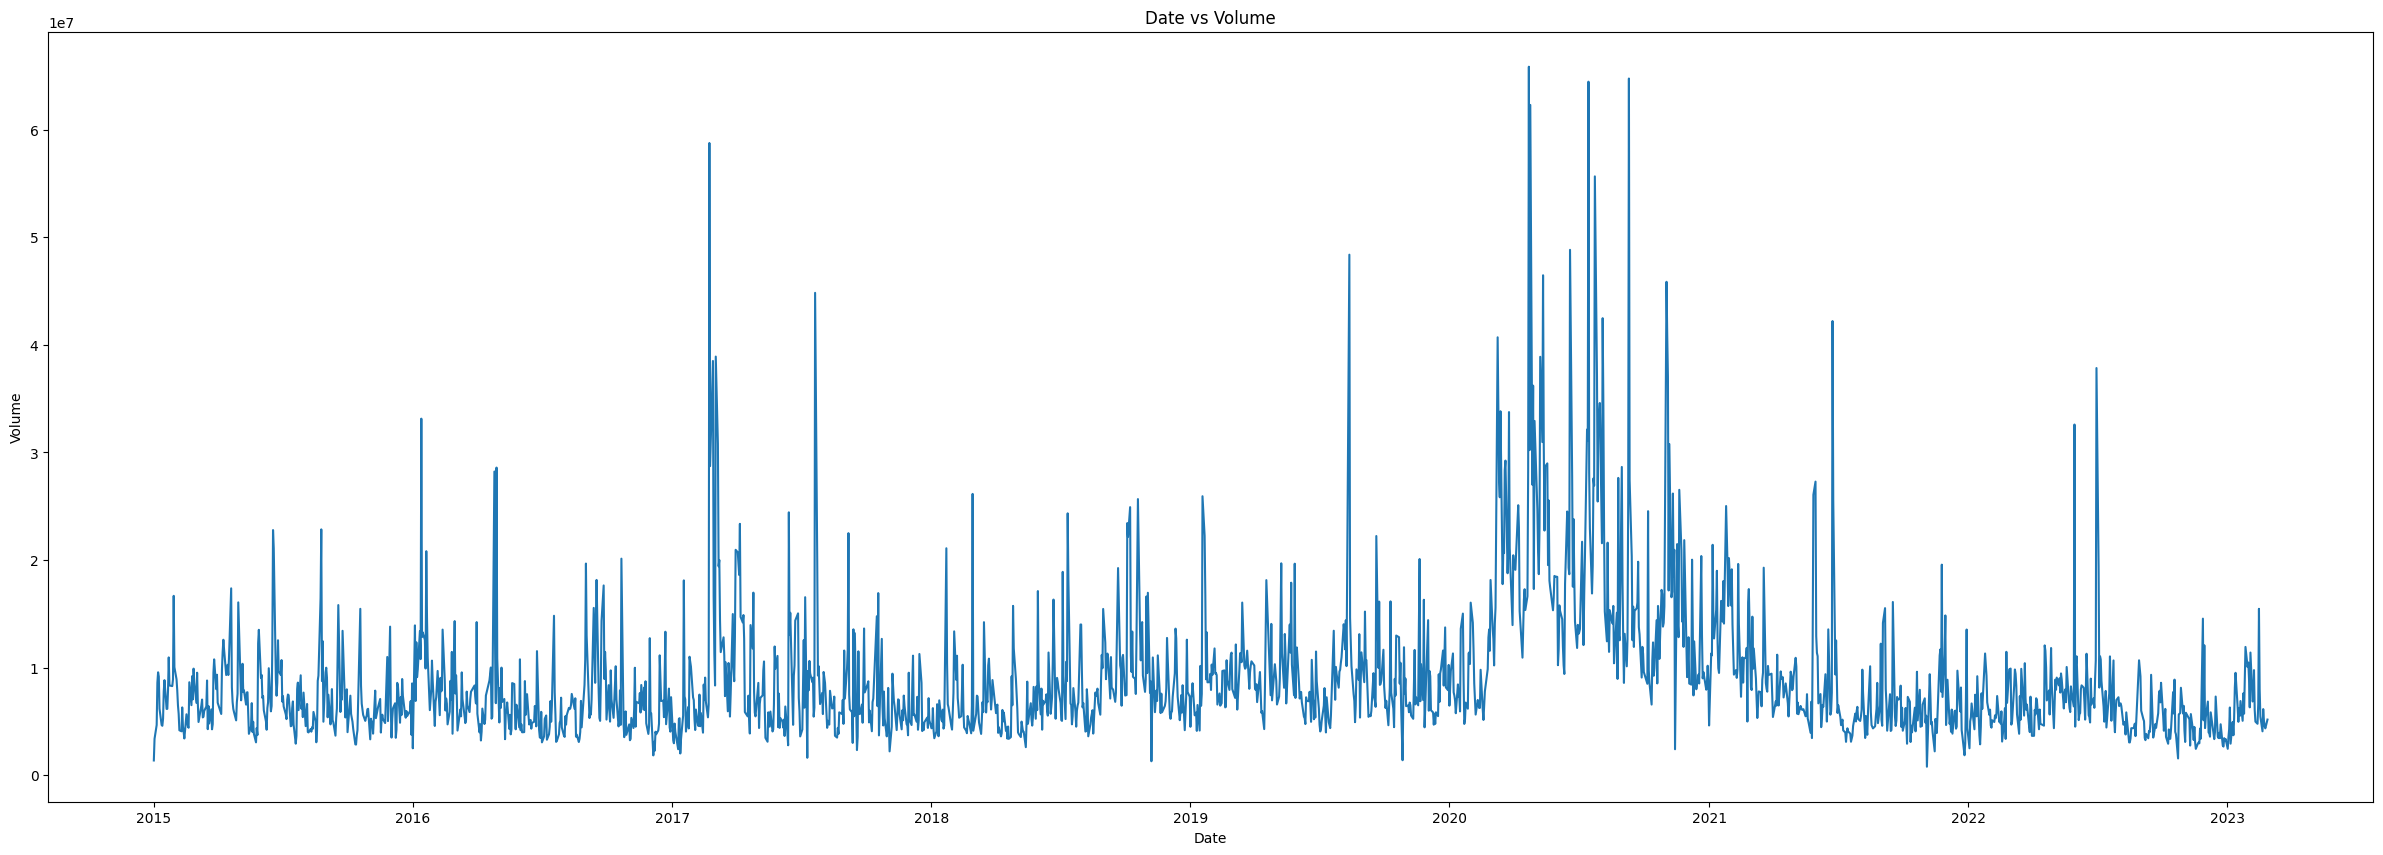

In [22]:
figure=plt.figure(figsize=(30,10))
plt.plot(reliance['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

## Finding long-term and short-term trends

### Moving Average

In [23]:
reliance_ma=reliance.copy()
reliance_ma['30-day MA']=reliance['Close'].rolling(window=30).mean()
reliance_ma['200-day MA']=reliance['Close'].rolling(window=200).mean()

In [24]:
reliance_ma

,Open,High,Low,Close,Volume,30-day MA,200-day MA
Date,,,,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311,1367720,NaN,NaN
2015-01-02,439.880371,443.818054,437.998199,438.617340,3383424,NaN,NaN
2015-01-05,438.344940,441.267212,432.946106,433.812897,4662967,NaN,NaN
2015-01-06,430.915344,432.401276,412.093750,414.124512,8596809,NaN,NaN
2015-01-07,414.619812,425.367950,414.570282,423.139069,9562421,NaN,NaN
...,...,...,...,...,...,...,...
2023-02-21,2424.000000,2446.800049,2412.350098,2434.100098,6143298,2404.193335,2524.999009
2023-02-22,2425.949951,2430.000000,2375.050049,2378.899902,5087729,2398.210002,2524.302008
2023-02-23,2378.000000,2394.750000,2361.350098,2367.500000,4546655,2392.921672,2523.766259


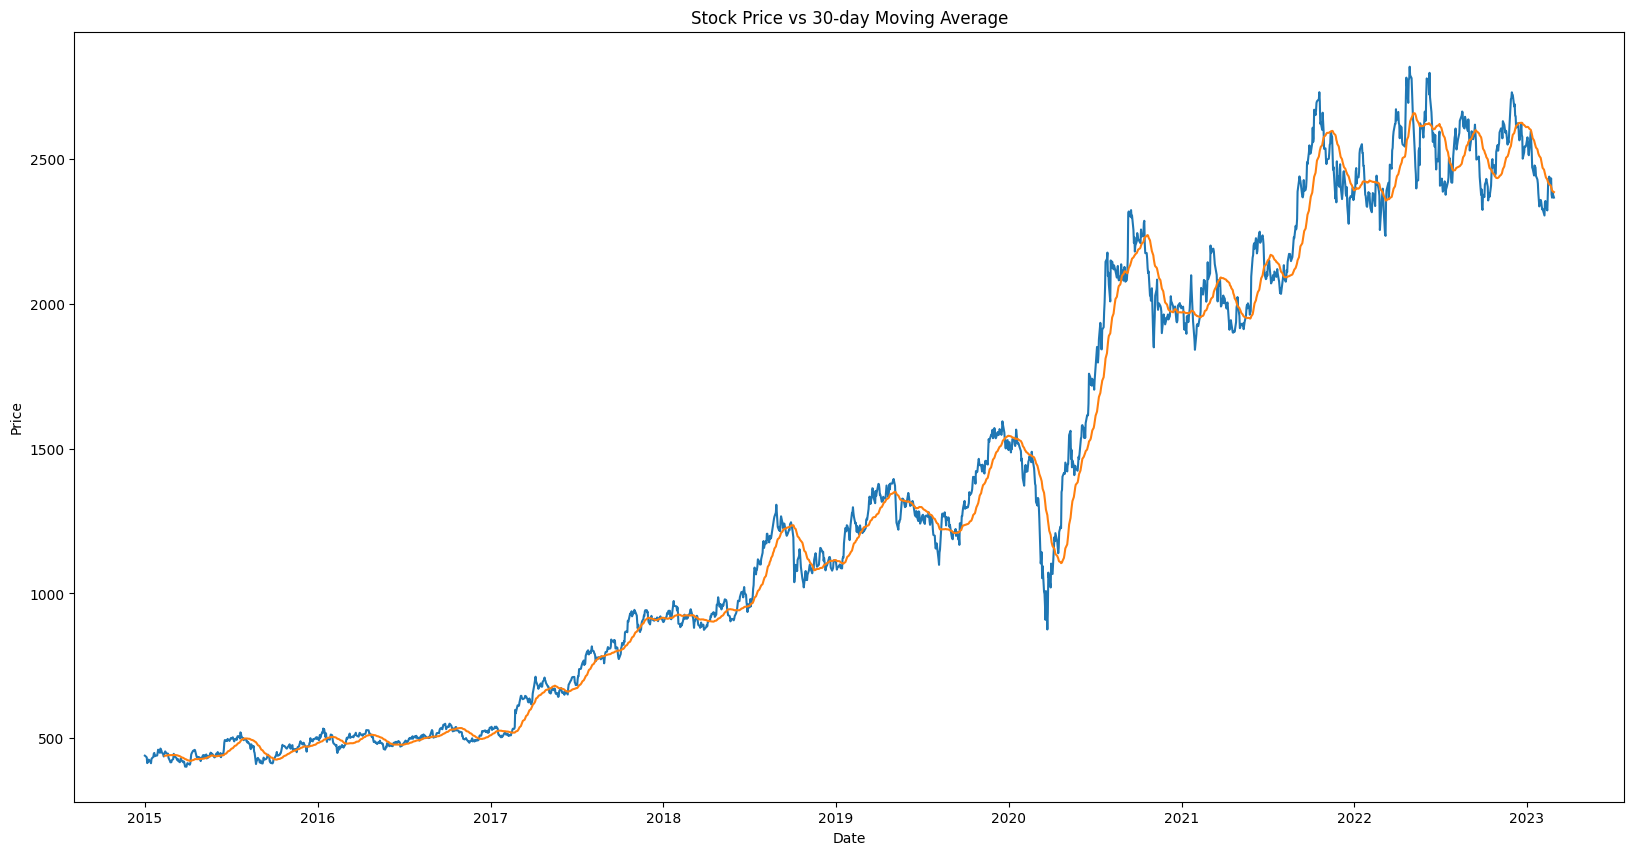

In [25]:
plt.figure(figsize=(20,10))
plt.plot(reliance_ma['Close'],label='Original data')
plt.plot(reliance_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

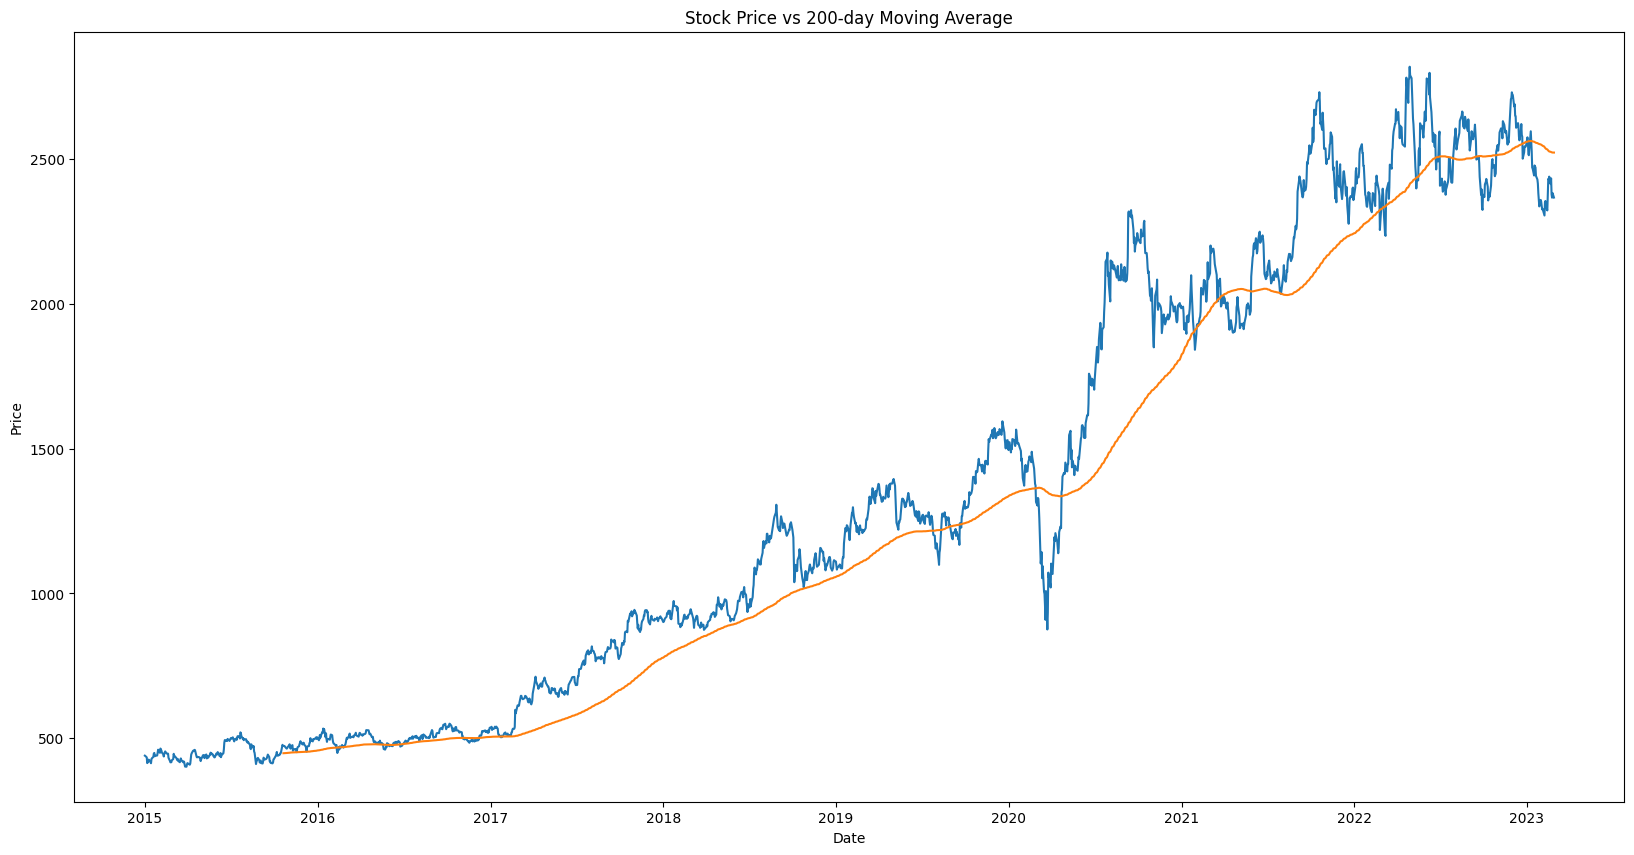

In [26]:
plt.figure(figsize=(20,10))
plt.plot(reliance_ma['Close'],label='Original data')
plt.plot(reliance_ma['200-day MA'],label='200-MA')
plt.legend
plt.title('Stock Price vs 200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Long term and short term trends can be identified using the Moving Average graphs
- In long term, Stock price is in upward trend
- Short term trends can be identified from MA-30 chart
- Stock had a major short term downtrend during the year 2020
- It may be due to the bearish market during the Covid-19 outbraek

## Model Building

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [28]:
reliance

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311,1367720
2015-01-02,439.880371,443.818054,437.998199,438.617340,3383424
2015-01-05,438.344940,441.267212,432.946106,433.812897,4662967
2015-01-06,430.915344,432.401276,412.093750,414.124512,8596809
2015-01-07,414.619812,425.367950,414.570282,423.139069,9562421
...,...,...,...,...,...
2023-02-21,2424.000000,2446.800049,2412.350098,2434.100098,6143298
2023-02-22,2425.949951,2430.000000,2375.050049,2378.899902,5087729
2023-02-23,2378.000000,2394.750000,2361.350098,2367.500000,4546655


In [29]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(reliance['Close'])
close_df

,Close
Date,
2015-01-01,439.781311
2015-01-02,438.617340
2015-01-05,433.812897
2015-01-06,414.124512
2015-01-07,423.139069
...,...
2023-02-21,2434.100098
2023-02-22,2378.899902
2023-02-23,2367.500000


In [30]:
print(close_df.shape)

(2016, 1)


In [31]:
close_df=close_df.reset_index()

In [32]:
close_df['Date']

0      2015-01-01
1      2015-01-02
2      2015-01-05
3      2015-01-06
4      2015-01-07
          ...    
2011   2023-02-21
2012   2023-02-22
2013   2023-02-23
2014   2023-02-24
2015   2023-02-27
Name: Date, Length: 2016, dtype: datetime64[ns]

### Normalizing / scaling close value between 0 to 1

In [33]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(2016, 1)


### Split data for training and testing
- Ratio for training and testing data is 86:14

In [34]:
training_size=int(len(closedf)*0.86)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1733, 1)
test_data:  (283, 1)


### Create new dataset according to requirement of time-series prediction

In [35]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1719, 13)
y_train:  (1719,)
X_test:  (269, 13)
y_test (269,)


## Algorithms

## Support vector regression - SVR

In [37]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [38]:
# Lets Do the prediction 

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1719, 1)
Test data prediction: (269, 1)


In [39]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [40]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))


Train data RMSE:  53.85670681684618
Train data MSE:  2900.5448691557253
Test data MAE:  39.366452827323045
-------------------------------------------------------------------------------------
Test data RMSE:  87.5714602677524
Test data MSE:  7668.760653426538
Test data MAE:  70.07967998501645


### Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [41]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9928377308769303
Test data explained variance regression score: 0.5781743381324678


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best

0 or < 0 = worse

In [42]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.9928173702339906
Test data R2 score: 0.49266370365735235


### Comparision between original stock close price vs predicted close price

In [43]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [44]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [45]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [46]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [47]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Random Forest Regressor - RF

In [48]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [49]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1719, 1)
Test data prediction: (269, 1)


In [50]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [51]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  9.957621376341947
Train data MSE:  99.15422347458208
Test data MAE:  6.326936978023383
-------------------------------------------------------------------------------------
Test data RMSE:  49.26346909891491
Test data MSE:  2426.889387659744
Test data MAE:  36.74819274221652


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [52]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9997545334452742
Test data explained variance regression score: 0.8410796804542147


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [53]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9997544640372478
Test data R2 score: 0.8394461466184335


### Comparision between original stock close price vs predicted close price

In [54]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [55]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [56]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [57]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [58]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### K-nearest neighgbour - KNN

In [59]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [60]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1719, 1)
Test data prediction: (269, 1)


In [61]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [62]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  31.26989801027244
Train data MSE:  977.8065215728402
Test data MAE:  19.9213659517204
-------------------------------------------------------------------------------------
Test data RMSE:  61.91976520595533
Test data MSE:  3834.0573231606363
Test data MAE:  47.47158990630361


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [63]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9975802136664563
Test data explained variance regression score: 0.747109311261385


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [64]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9975786541687627
Test data R2 score: 0.7463532205261103


### Comparision between original stock close price vs predicted close price

In [65]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [66]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [67]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [68]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### Plotting whole closing stock price with prediction

In [69]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### LSTM

In [70]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1719, 13, 1)
X_test:  (269, 13, 1)


### LSTM model structure

In [71]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 13, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
54/54 [==============================] - 8s 38ms/step - loss: 0.0203 - val_loss: 0.0035
Epoch 2/100
54/54 [==============================] - 1s 13ms/step - loss: 7.1890e-04 - val_loss: 0.0018
Epoch 3/100
54/54 [==============================] - 1s 13ms/step - loss: 6.8099e-04 - val_loss: 0.0017
Epoch 4/100
54/54 [==============================] - 1s 13ms/step - loss: 6.7484e-04 - val_loss: 0.0018
Epoch 5/100
54/54 [==============================] - 1s 13ms/step - loss: 6.5749e-04 - val_loss: 0.0021
Epoch 6/100
54/54 [==============================] - 1s 12ms/step - loss: 6.7309e-04 - val_loss: 0.0020
Epoch 7/100
54/54 [==============================] - 1s 12ms/step - loss: 6.7735e-04 - val_loss: 0.0017
Epoch 8/100
54/54 [==============================] - 1s 13ms/step - loss: 6.4849e-04 - val_loss: 0.0019
Epoch 9/100
54/54 [==============================] - 1s 12ms/step - loss: 6.7471e-04 - val_loss: 0.0017
Epoch 10/100
54/54 [==============================] - 1s 12ms/step -

In [74]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

9/9 [==============================] - 0s 5ms/step


((1719, 1), (269, 1))

In [75]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [76]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  25.99097457391929
Train data MSE:  675.5307593021189
Test data MAE:  17.727496774616874
-------------------------------------------------------------------------------------
Test data RMSE:  43.894837273579846
Test data MSE:  1926.7567392740548
Test data MAE:  32.94807791444006


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [77]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9983272519080598
Test data explained variance regression score: 0.8865699617133523


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [78]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.9983271807337941
Test data R2 score: 0.8725330373142152


### Comparision between original stock close price vs predicted close price

In [79]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [80]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [81]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [82]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [83]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### GRU (Gated Recurrent Unit)

In [84]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1719, 13, 1)
X_test:  (269, 13, 1)


In [85]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 13, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22401 (87.50 KB)
Trainable params: 22401 (87.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
54/54 [==============================] - 11s 47ms/step - loss: 0.0183 - val_loss: 0.0036
Epoch 2/100
54/54 [==============================] - 1s 18ms/step - loss: 4.7304e-04 - val_loss: 0.0011
Epoch 3/100
54/54 [==============================] - 1s 17ms/step - loss: 4.5567e-04 - val_loss: 0.0015
Epoch 4/100
54/54 [==============================] - 1s 17ms/step - loss: 4.7362e-04 - val_loss: 0.0011
Epoch 5/100
54/54 [==============================] - 1s 16ms/step - loss: 4.3199e-04 - val_loss: 0.0011
Epoch 6/100
54/54 [==============================] - 1s 17ms/step - loss: 4.3794e-04 - val_loss: 0.0011
Epoch 7/100
54/54 [==============================] - 1s 17ms/step - loss: 4.2949e-04 - val_loss: 0.0015
Epoch 8/100
54/54 [==============================] - 1s 17ms/step - loss: 3.6875e-04 - val_loss: 8.3098e-04
Epoch 9/100
54/54 [==============================] - 1s 17ms/step - loss: 3.9490e-04 - val_loss: 8.5189e-04
Epoch 10/100
54/54 [==============================] - 1s 17

In [88]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

9/9 [==============================] - 0s 5ms/step


((1719, 1), (269, 1))

In [89]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [90]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  25.73907513518426
Train data MSE:  662.4999888146608
Test data MAE:  17.55999841074253
-------------------------------------------------------------------------------------
Test data RMSE:  47.67159174517541
Test data MSE:  2272.5806595186764
Test data MAE:  36.36573445486757


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [91]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9983600599411397
Test data explained variance regression score: 0.8933883625340935


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [92]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.998359448877953
Test data R2 score: 0.8496546303834671


### Comparision between original stock close price vs predicted close price

In [93]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


In [94]:
plotdf.head(100)

,Date,original_close,train_predicted_close,test_predicted_close
0,2015-01-01,439.781311,NaN,NaN
1,2015-01-02,438.617340,NaN,NaN
2,2015-01-05,433.812897,NaN,NaN
3,2015-01-06,414.124512,NaN,NaN
4,2015-01-07,423.139069,NaN,NaN
...,...,...,...,...
95,2015-05-25,443.050323,458.023407,NaN
96,2015-05-26,438.146820,456.135010,NaN
97,2015-05-27,438.493530,452.358551,NaN
98,2015-05-28,433.788116,450.835602,NaN


### Predicting next 30 days

In [95]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [96]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [97]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [98]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [99]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

,svr,rf,knn,lstm,gru
0,439.781311,439.781311,439.781311,439.781311,439.781311
1,438.617340,438.617340,438.617340,438.617340,438.617340
2,433.812897,433.812897,433.812897,433.812897,433.812897
3,414.124512,414.124512,414.124512,414.124512,414.124512
4,423.139069,423.139069,423.139069,423.139069,423.139069
...,...,...,...,...,...
2041,2260.744861,2394.921494,2410.892278,2184.754432,2076.226202
2042,2256.756377,2395.458005,2407.942289,2179.195786,2069.480123
2043,2252.779179,2396.667515,2415.161508,2173.710940,2062.916816
2044,2248.813743,2396.479014,2418.903809,2168.298596,2056.528495


### Conclusion Chart

In [100]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:], 
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [101]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

,Model,Train R2 Score,Test R2 Score
0,SVR,0.992817,0.492664
1,Random Forest,0.999754,0.839446
2,KNN,0.997579,0.746353
3,LSTM,0.998327,0.872533
4,GRU,0.998359,0.849655


## By Looking into this table we can say that our LSTM model have best R2 score.

## so we are going to use LSTM model for our deployment part.